In [ ]:
#Code to plot \Delta E_{int}(Gnedin et al. 99)/\Delta E_{int}(non-perturbative) vs eccentricity for given orbital energy
#for spherical perturber

#-------Created by Uddipan Banik-------

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.pylab import *
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib.patches import BoxStyle
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
from scipy.special import erf as errorfunc
from scipy.special import gamma, factorial
from scipy.signal import argrelextrema 
from matplotlib import cm
from numpy import linalg
import time
import os
import h5py
import string
from eccentric_functions_spherical_perturber import *

#-----------------------------------------------------------------



In [4]:
#-------Input parameters-------

Nrp=3                                  #Scale radius of perturber in units of rs (scale radius of subject)
rpmin=1e0                              #Minimum rp
rpmax=1e2                              #Maximum rp
rp=np.logspace(np.log10(rpmin),np.log10(rpmax),num=Nrp) #rp

perturber_flag=1                       #perturber_flag: 1: Hernquist sphere, 2: NFW, 3: Plummer sphere, 4: Isochrone
subject_flag=2                         #subject_flag: 1: Plummer sphere, 2: Hernquist sphere, 3: NFW

mass_ratio=1e-3                        #Subject mass Ms/Perturber mass Mp
E0=-0.7                                #Orbital energy

adcorr_flag=1                          #Adiabatic correction: 1- on, 0- off


In [5]:
#-------Loading and interpolating data-------

Ne=40                                  #No of points in eccentricity
data=np.loadtxt("eccentric_encounter_perturber%d_subject%d_rp_%.3f_E0_%.1f_adcorr_trunc.dat" %(perturber_flag,subject_flag,rp[0],E0))
e=data[:,0]
Ne_smooth=100
esmooth0=np.linspace(e.min(),0.009,(int)(Ne_smooth/4))
esmooth1=np.linspace(0.01,0.949,(int)(Ne_smooth/2))
esmooth2=np.linspace(0.95,e.max(),(int)(Ne_smooth/4))
esmooth=np.array(esmooth0.tolist()+esmooth1.tolist()+esmooth2.tolist())

DELEINT_trunc1=np.zeros((Nrp,Ne))
DELEINT_trunc2=np.zeros((Nrp,Ne))
DELEINT_tidal1=np.zeros((Nrp,Ne))
DELEINT_tidal2=np.zeros((Nrp,Ne))

DELEINT_trunc1_smoothed=np.zeros((Nrp,Ne_smooth))
DELEINT_trunc2_smoothed=np.zeros((Nrp,Ne_smooth))
DELEINT_tidal1_smoothed=np.zeros((Nrp,Ne_smooth))
DELEINT_tidal2_smoothed=np.zeros((Nrp,Ne_smooth))

for i in range(Nrp):
    data=np.loadtxt("eccentric_encounter_perturber%d_subject%d_rp_%.3f_E0_%.1f_adcorr_trunc.dat" %(perturber_flag,subject_flag,rp[i],E0))
    DELEINT_trunc1[i]=data[:,1]
    DELEINT_tidal1[i]=data[:,2]
    DELEINT_trunc2[i]=data[:,3]
    DELEINT_tidal2[i]=data[:,4]
    
    DELEINT_trunc1_spline=CubicSpline(e,DELEINT_trunc1[i])
    DELEINT_trunc2_spline=CubicSpline(e,DELEINT_trunc2[i])
    DELEINT_tidal1_spline=CubicSpline(e,DELEINT_tidal1[i])
    DELEINT_tidal2_spline=CubicSpline(e,DELEINT_tidal2[i])
    
    DELEINT_trunc1_smoothed[i]=DELEINT_trunc1_spline(esmooth)
    DELEINT_trunc2_smoothed[i]=DELEINT_trunc2_spline(esmooth)
    DELEINT_tidal1_smoothed[i]=DELEINT_tidal1_spline(esmooth)
    DELEINT_tidal2_smoothed[i]=DELEINT_tidal2_spline(esmooth)

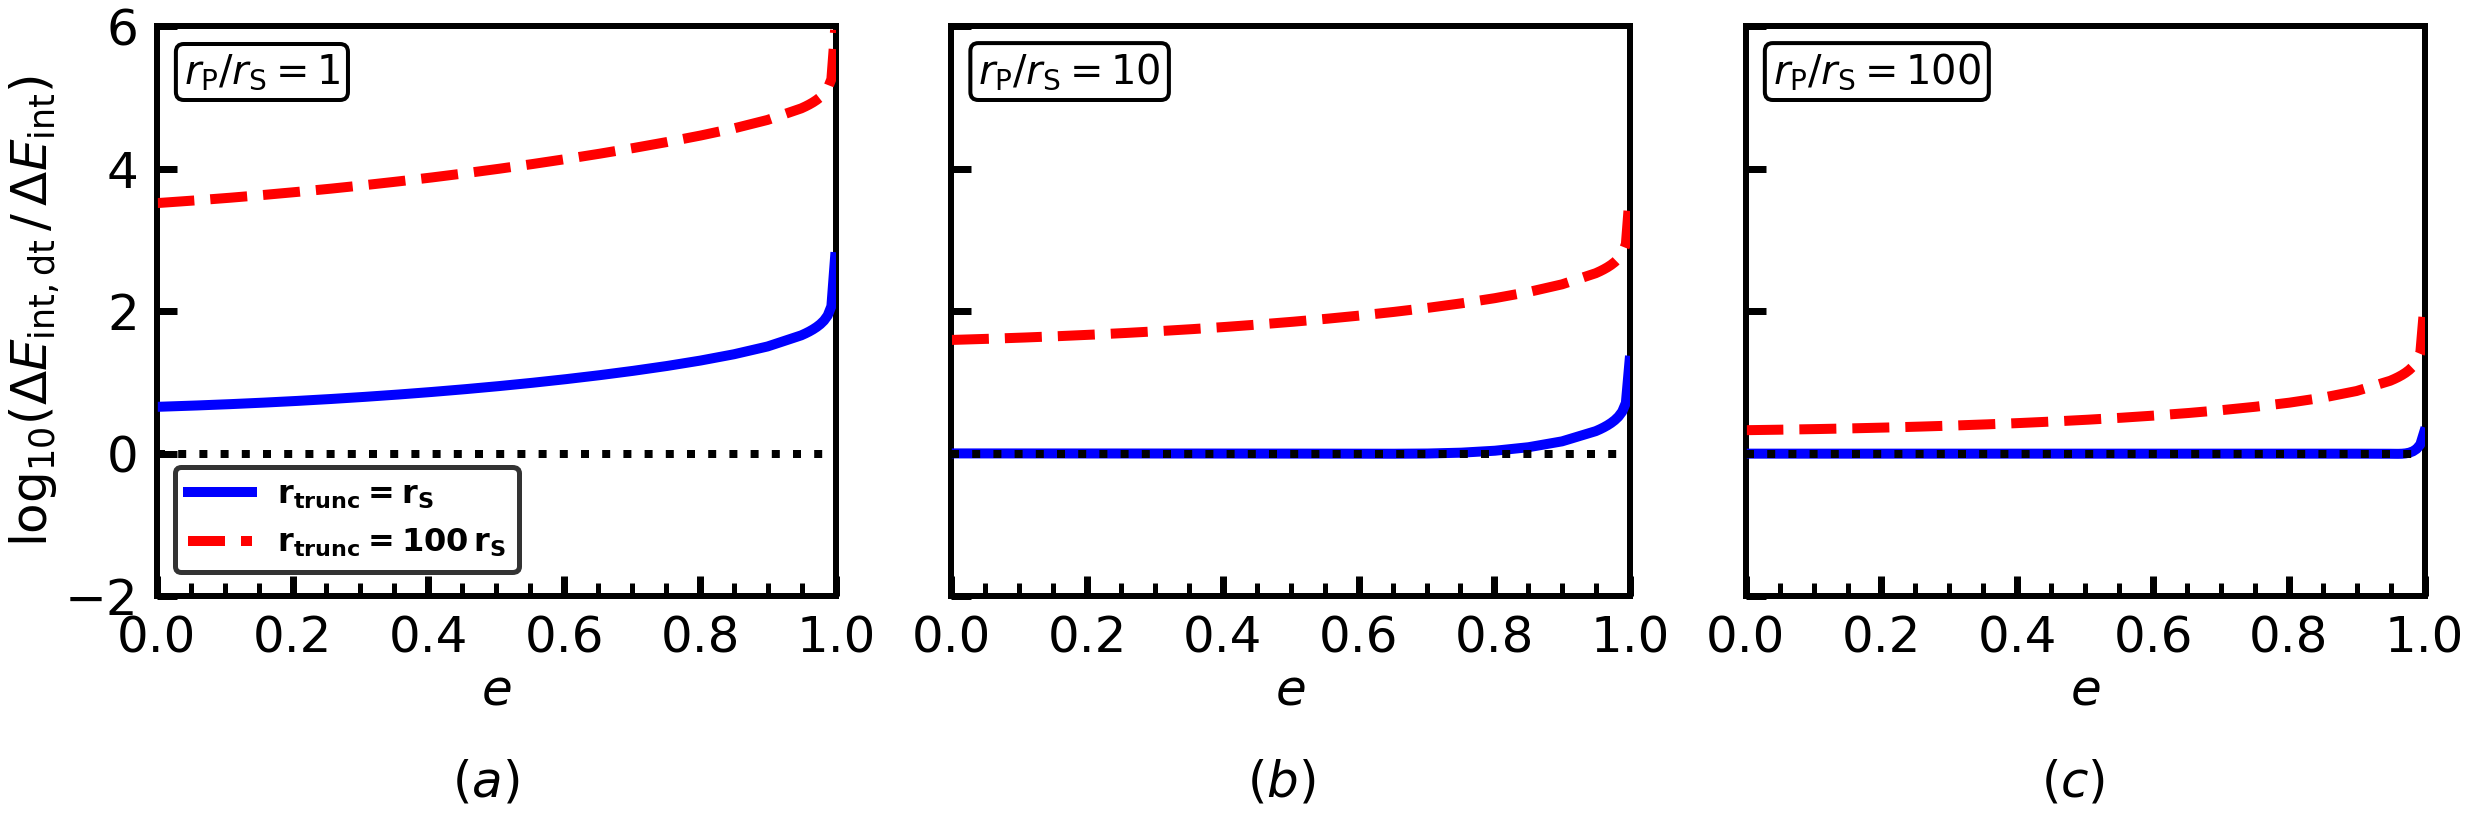

In [7]:
#-------Plot-------

fig,ax=plt.subplots(1,3,figsize=(35,12))
plt.subplots_adjust(top=0.95,bottom=0.29,left=0.08,right=0.98,wspace=0.17)
legend_properties = {"size":32,"weight":"bold"}

for i in range(Nrp):
    #ax[i].plot(e_smooth,(1/DELEINT_trunc1_smoothed[i])*DELEINT_tidal1_smoothed[i],color='b',lw=7,label='$r_{\mathrm{trunc}}=r_{\mathrm{S}}$')
    #ax[i].plot(e_smooth,(1/DELEINT_trunc2_smoothed[i])*DELEINT_tidal2_smoothed[i],ls='--',color='r',lw=7,label='$r_{\mathrm{trunc}}=100r_{\mathrm{S}}$')
    ax[i].plot(e,np.log10((1/DELEINT_trunc1[i])*DELEINT_tidal1[i]),color='b',lw=10,label='$\mathbf{r}_{\mathrm{\mathbf{trunc}}}\mathbf{=r}_{\mathrm{\mathbf{S}}}$')
    ax[i].plot(e,np.log10((1/DELEINT_trunc2[i])*DELEINT_tidal2[i]),ls='--',color='r',lw=10,label='$\mathbf{r}_{\mathrm{\mathbf{trunc}}}\mathbf{=}\mathbf{100}\,\mathbf{r}_{\mathrm{\mathbf{S}}}$')
    
    #ax[i].set_yscale('log')
    
    ax[i].xaxis.set_minor_locator(AutoMinorLocator(4))
    ax[i].tick_params(which='major', direction='in', width=7, length=20, color='k', pad=18)
    ax[i].tick_params(which='minor', direction='in', width=5, length=13, color='k', pad=15)
    ax[i].set_xticks(np.linspace(0,1,6))
    
    if (i==0):
        ax[i].set_yticks(np.linspace(np.log10(1e-2),np.log10(1e6),5))
        ax[i].set_ylabel('$\log_{10}{\left(\Delta E_{\mathrm{int,dt}}\,/\,\Delta E_{\mathrm{int}}\\right)}$',fontsize=50)
        leg=ax[i].legend(bbox_to_anchor=[0.28, 0.135],loc='center',prop=legend_properties)
        leg.get_frame().set_edgecolor('k')
        leg.get_frame().set_linewidth('5.0')
    else:
        ax[i].set_yticks(np.linspace(np.log10(1e-2),np.log10(1e6),5))
        ax[i].tick_params(labelleft=False)
        
    #locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 
    #ax.yaxis.set_minor_locator(locmin)
    #ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax[i].set_xlim([0,1])
    ax[i].set_ylim([-2,6])
    ax[i].tick_params(labelsize=50)
    
    ax[i].set_xlabel('$e$',fontsize=50)
    
    ax[i].patch.set_edgecolor('k')  
    ax[i].patch.set_linewidth('6')
    ax[i].axhline(y=0,color='k',ls=':',lw=8)


    ax[i].text(0.04, 5.2, '$r_{\mathrm{P}}/r_{\mathrm{S}}=%.0f$' %(rp[i]), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=4, pad=0.2, alpha=1), fontsize=40)
    ax[i].text(0.435, -0.35, '$(%s)$' %(string.ascii_lowercase[i]), transform=ax[i].transAxes, size=50)
    
plt.savefig('deltaEintratio_vs_e_perturber%d_subject%d_E%.1f_massratio_%.1f_adcorr%d.jpeg' %(perturber_flag,subject_flag,E0,1.0/mass_ratio,adcorr_flag))
#plt.savefig('deltaEintratio_vs_e_perturber%d_subject%d_E%.1f_massratio_%.1f_adcorr%d.eps' %(perturber_flag,subject_flag,E0,1.0/mass_ratio,adcorr_flag))

plt.show()